This example depicts half and full wave rectification.


(-11.0, 11.0)

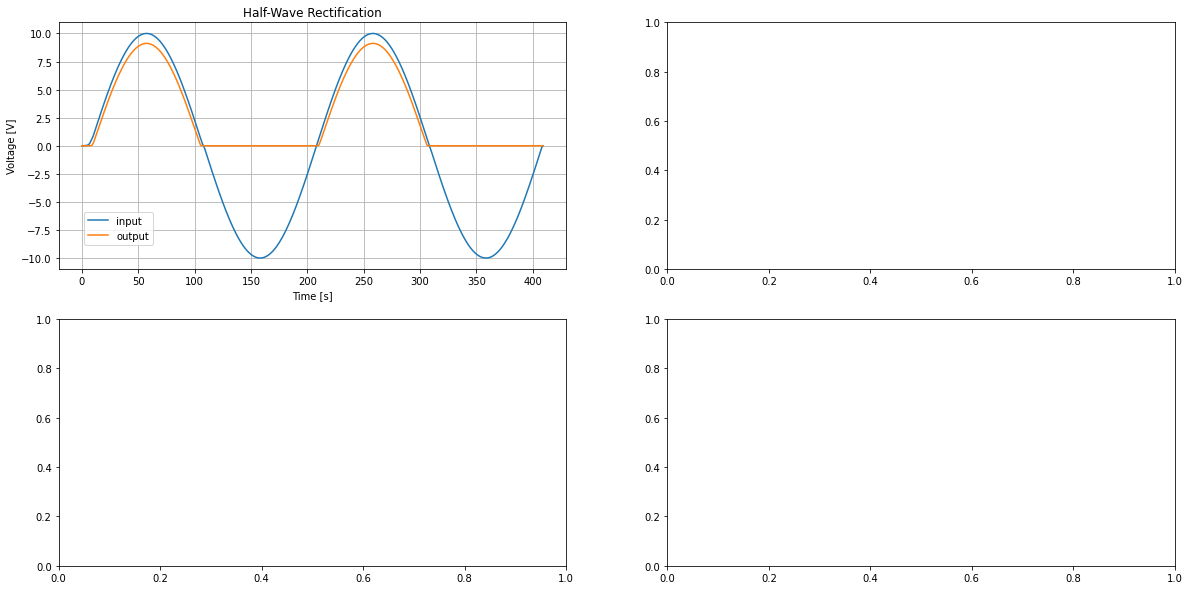

In [ ]:


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


figure1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))


circuit = Circuit('half-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10@u_V, frequency=50@u_Hz)
circuit.X('D1', '1N4148', 'in', 'output')
circuit.R('load', 'output', circuit.gnd, 100@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax1.set_title('Half-Wave Rectification')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax1.grid()
ax1.plot(analysis['in'])
ax1.plot(analysis.output)
ax1.legend(('input', 'output'), loc=(.05,.1))
ax1.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))




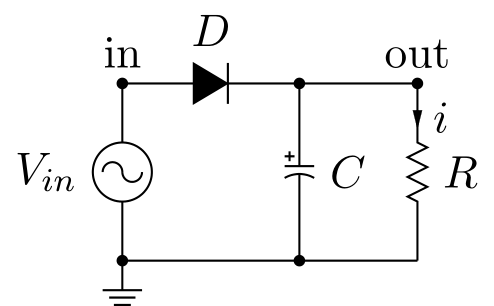

In [ ]:

circuit.C('1', 'output', circuit.gnd, 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax2.set_title('Half-Wave Rectification with filtering')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]')
ax2.grid()
ax2.plot(analysis['in'])
ax2.plot(analysis.output)
ax2.legend(('input', 'output'), loc=(.05,.1))
ax2.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))


circuit = Circuit('half-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10, frequency=50)
circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.R('load', 'output_plus', 'output_minus', 100@u_Ω)
circuit.X('D2', '1N4148', 'output_minus', circuit.gnd)
circuit.X('D3', '1N4148', circuit.gnd, 'output_plus')
circuit.X('D4', '1N4148', 'output_minus', 'in')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax3.set_title('Full-Wave Rectification')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Voltage [V]')
ax3.grid()
ax3.plot(analysis['in'])
ax3.plot(analysis.output_plus - analysis.output_minus)
ax3.legend(('input', 'output'), loc=(.05,.1))
ax3.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))




(-11.0, 11.0)

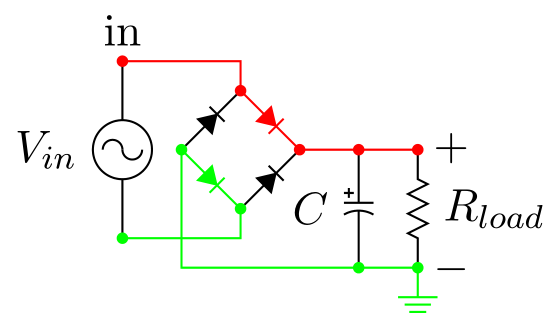

In [ ]:

circuit.C('1', 'output_plus', 'output_minus', 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax4.set_title('Full-Wave Rectification with filtering')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Voltage [V]')
ax4.grid()
ax4.plot(analysis['in'])
ax4.plot(analysis.output_plus - analysis.output_minus)
ax4.legend(('input', 'output'), loc=(.05,.1))
ax4.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()



<Figure size 432x288 with 0 Axes>

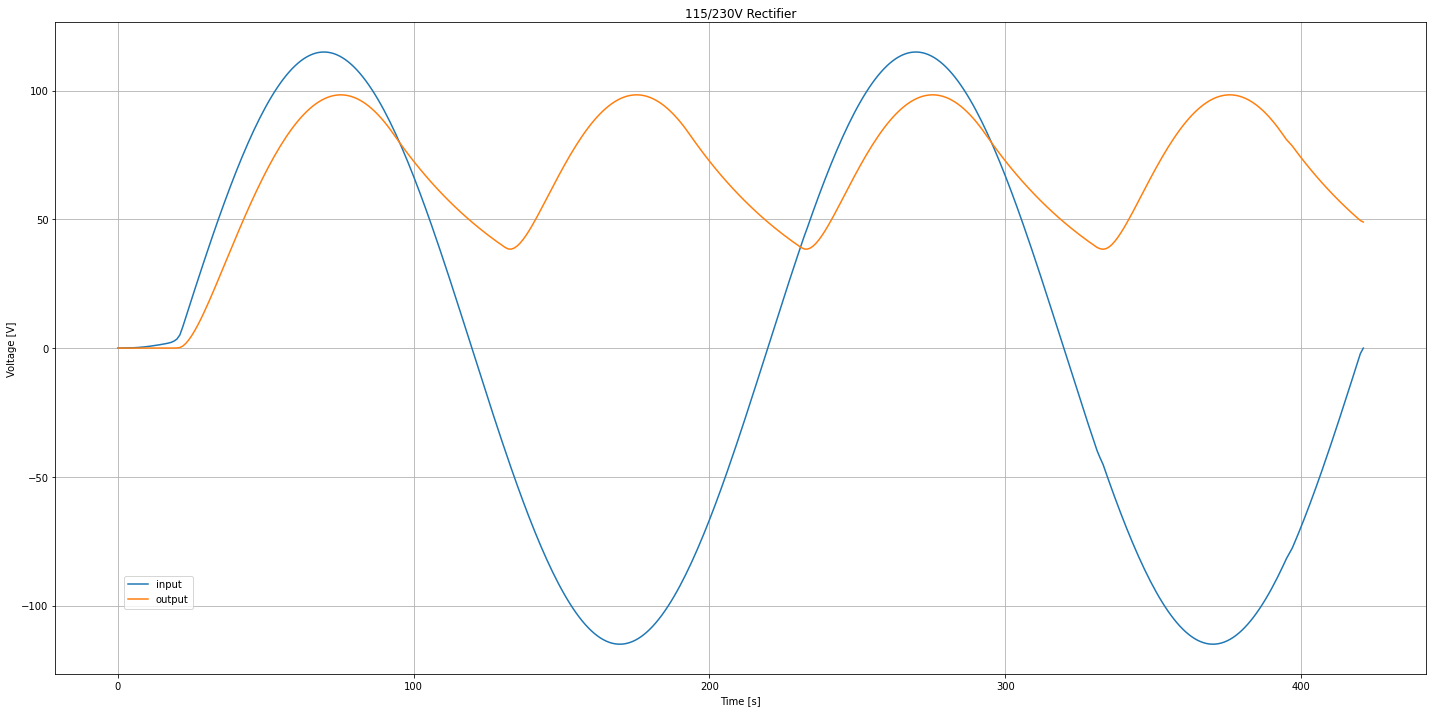

In [ ]:


circuit = Circuit('115/230V Rectifier')
circuit.include(spice_library['1N4148'])
on_115 = True # switch to select 115 or 230V
if on_115:
    node_230 = circuit.gnd
    node_115 = 'node_115'
    amplitude = 115@u_V
else:
    node_230 = 'node_230'
    node_115 = circuit.gnd
    amplitude = 230@u_V
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=amplitude, frequency=50) # Fixme: rms
circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.X('D3', '1N4148', node_230, 'output_plus')
circuit.X('D2', '1N4148', 'output_minus', node_230)
circuit.X('D4', '1N4148', 'output_minus', 'in')
circuit.C('1', 'output_plus', node_115, 1@u_mF)
circuit.C('2', node_115, 'output_minus', 1@u_mF)
circuit.R('load', 'output_plus', 'output_minus', 10@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
if on_115:
    simulator.initial_condition(node_115=0)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

figure2, ax = plt.subplots(figsize=(20, 10))
ax.set_title('115/230V Rectifier')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
ax.plot(analysis['in'])
ax.plot(analysis.output_plus - analysis.output_minus)
ax.legend(('input', 'output'), loc=(.05,.1))
# ax.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()

